## Exercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### METADATA
- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

#### Q1

In [3]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

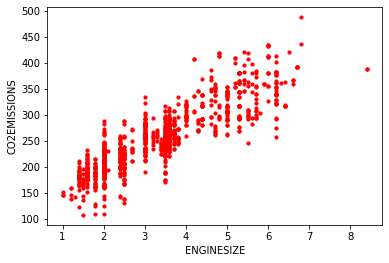

In [4]:
data.plot.scatter(x = 'ENGINESIZE', y = 'CO2EMISSIONS',s = 10, c = 'red')

#### Q2

In [5]:
X = data.drop("CO2EMISSIONS",axis = 1)
Y = data.CO2EMISSIONS

In [7]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 25)

In [36]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print(r2_score(Y_test, Y_pred))

0.8459951338026139


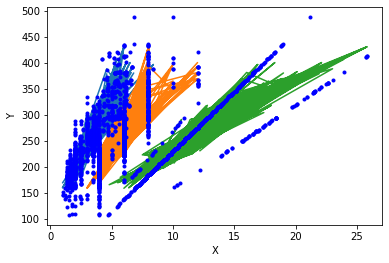

In [39]:
plt.plot(X_train,lr.predict(X_train))
plt.plot(X,Y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
# loop for degrees 3, 4, 5
for deg in np.arange(3,6):
    poly = PolynomialFeatures(degree=deg)       # generating polynomial
    train_x_poly = poly.fit_transform(X_train)  # fitting and transforming data
    test_x_poly = poly.fit_transform(X_test)
    clf = LinearRegression()                    
    model = clf.fit(train_x_poly, Y_train)      # fitting to linear regression model
    y_pred = clf.predict(test_x_poly)           # predicting values (test set)
    print("For degree", deg, ":")
    print("Mean absolute error (MAE): %.4f" % np.mean(np.absolute(y_pred - Y_test)))
    print("Residual sum of squares (MSE): %.4f" % np.mean((y_pred - Y_test) ** 2))
    print("R2-score: %.4f" % r2_score(y_pred, Y_test))
    print("\n")

For degree 3 :
Mean absolute error (MAE): 11.9313
Residual sum of squares (MSE): 354.3421
R2-score: 0.8992


For degree 4 :
Mean absolute error (MAE): 9.6327
Residual sum of squares (MSE): 301.3673
R2-score: 0.9175


For degree 5 :
Mean absolute error (MAE): 10.2219
Residual sum of squares (MSE): 1104.6969
R2-score: 0.7115




#### The model with degree 4 is concidered the best as it has lowest Mean Absolute Error along with the highest R2 score of .9175